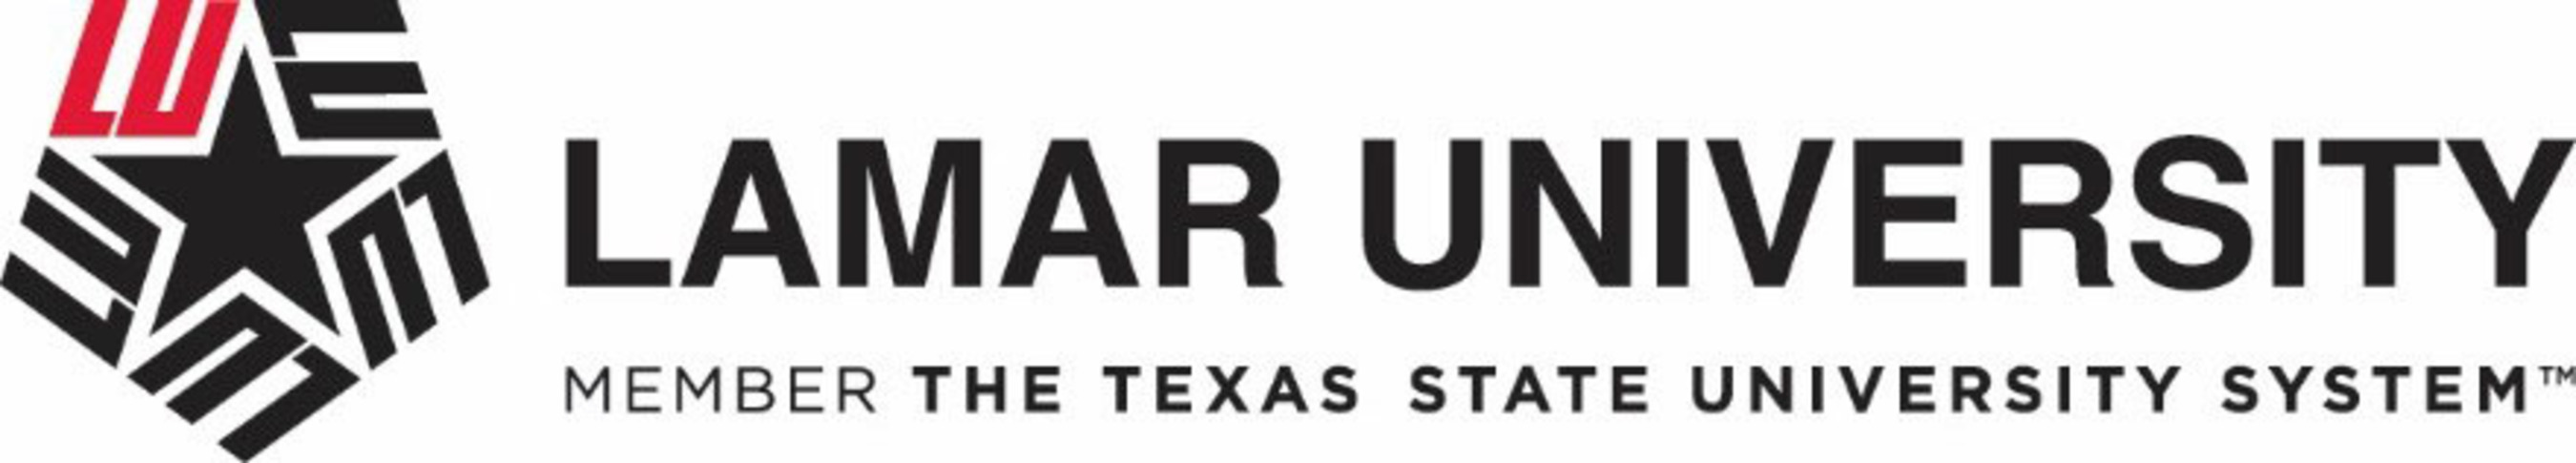

<center> <h1> <font color='blue'> Bridge and Culvert of South East Texas<font> </h1> </center>

<center> <h1> <font color='brown'> BROWN TEAM<font> </h1> </center>

<p> These are the links we used to download data </p>
<p> For bridge and culvert data: https://data-usdot.opendata.arcgis.com/datasets/national-bridge-inventory/explore?location=9.329692%2C-14.711150%2C2.79 </p>
<p> Coding guide for structure inventory and appraisal of the bridges and culverts https://www.fhwa.dot.gov/bridge/nbi.cfm </p>

<p> <font color='blue'>The characteristics of bridges and culverts we used are: </font></p>
 <p>   County code </p>
  <p>  Structure number </p>
  <p>  Features intersected </p>
  <p>  Facility carried </p>
   <p> Detour length </p>
   <p> Maintenance responsibility </p>
  <p>  Year built </p>
   <p> Annual daily traffic </p>
  <p>  Structure type (kind of material used) </p>
  <p>  Structure length </p> 
  <p>  Conditional rating </p>
   <p> Structural Evaluation </p>
   <p> Date of inspection </p>
   <p> Year reconstructed </p>
  <p>  Longitude </p>
  <p>  Latitude </p>
  

<p> <font color='blue'> Importing libraries </font> </p>

In [117]:
import pandas as pd
import sqlite3
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import shapefile 

<p> <font color='blue'> Importing the csv file of bridge and culvert </font> </p>

In [6]:
path = 'C:/Users/sanni/OneDrive/Desktop/Project2'
os.chdir(path)

<p> <font color='brown'>  </font> </p>

In [7]:
a = pd.read_csv('National_Bridge_Inventory.csv')


C:\Users\sanni\AppData\Local\Temp\ipykernel_3900\2216485518.py:1: DtypeWarning: Columns (4,8,10,20,34,39,40,41,42,74,76,78,99,101,105,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('National_Bridge_Inventory.csv')


<p> <font color='blue'> Filtering the data and taking data for Texas only </font> </p>

In [8]:
state = a.loc[(a.STATE_CODE_001==48)] 

<p> <font color='blue'> Taking bridge data by selecting CULVERT_COND_062=='N'</font> </p>

In [121]:
bridge = state.loc[(state.CULVERT_COND_062=='N')]

<p> <font color='blue'> Taking culvert data by selecting CULVERT_COND_062!='N' </font> </p>

In [12]:
culvert = state.loc[(state.CULVERT_COND_062!='N')]

In [13]:
state.to_csv('Texas.csv')

In [14]:
bridge.to_csv('B.csv')
culvert.to_csv('C.csv')

<p> <font color='blue'> Selecting the columns essential for making Relational database </font> </p>

In [15]:
data1 = bridge.iloc[:,[4,11,13,15,24,26,29,32,50,58,70,71,78,108,128,129]]

In [16]:
aa = data1.set_index('COUNTY_CODE_003')


In [17]:
bridge=aa.to_csv('bridge.csv')

In [18]:
data2 = culvert.iloc[:,[4,11,13,15,24,26,29,32,50,58,73,78,108,128,129]]

aa1 = data2.set_index('COUNTY_CODE_003')



In [19]:
aa1

,STRUCTURE_NUMBER_008,FEATURES_DESC_006A,FACILITY_CARRIED_007,DETOUR_KILOS_019,MAINTENANCE_021,YEAR_BUILT_027,ADT_029,STRUCTURE_KIND_043A,STRUCTURE_LEN_MT_049,CULVERT_COND_062,STRUCTURAL_EVAL_067,YEAR_RECONSTRUCTED_106,LATDD,LONGDD
COUNTY_CODE_003,,,,,,,,,,,,,,
375,0000000L2015318,West Amarillo Creek,CLIFFSIDE ROAD,24,68,2008.0,100,1,19.4,7,7,0.0,35.315839,-101.935450
245,000021525-00014,STAR LK ICWW OUTLET DTCH,ICWW LEVEE ROAD,159,63,1990.0,15,1,9.4,7,7,0.0,29.689167,-94.158167
119,010600013603019,DRAW,SH 24,16,1,1930.0,5695,1,8.5,6,6,2016.0,33.301067,-95.847819
119,010600013603026,HONEY CREEK,SH 24,3,1,1934.0,4433,1,9.8,7,6,2017.0,33.335042,-95.767203
119,010600013603083,DRAIN,SH 24,3,1,1967.0,4702,1,6.7,6,6,0.0,33.383278,-95.691017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,DAPFORHOO0BVM84,STORM DRAINAGE,CLEAR CREEK RD,5,74,2020.0,100,1,19.6,7,*,0.0,31.158150,-97.800339
27,DAPFORHOO0BVN01,STORM DRAINAGE,PERIMETER RD,2,74,1960.0,50,3,7.8,5,*,0.0,31.377769,-97.705561
99,DAPFORHOO0BVR10,OWL CREEK,HUBBARD ROAD,0,74,1991.0,75,1,6.1,7,7,0.0,31.261350,-97.639719


<p> <font color='blue'> Reading csv file</font> </p>

In [22]:
A4 = pd.read_csv('Maintenance Responsibility.csv')
A5 = pd.read_csv('Condition rating for Bridge.csv')
A7 = pd.read_csv('Culvert condition.csv')
A9 = pd.read_csv('Structure type, main.csv')
A10 = pd.read_csv('Appraisal Rating.csv')
A11 = pd.read_csv('Counties special.csv')

<p> <font color='blue'> Creating a database </font> </p>

In [65]:
con = sqlite3.connect('TXSEF.db') # create a connection

<p> <font color='blue'> Connecting all of the csv with new created database </font> </p>

In [66]:
aa.to_sql('bridge', con)
aa1.to_sql('culvert',con)
A4.to_sql('maintenance',con)
A5.to_sql('Condition',con)
A7.to_sql('culv_cond',con)
A9.to_sql('str_type',con)
A10.to_sql('Appraisal',con)
A11.to_sql('special',con)

con.commit()
cur = con.cursor()

<p> <font color='blue'> Connecting table bridge with special </font> </p>

In [69]:
cur.execute( '''create table Main as SELECT STRUCTURE_NUMBER_008, DETOUR_KILOS_019, MAINTENANCE_021, YEAR_BUILT_027, ADT_029, STRUCTURE_KIND_043A, STRUCTURE_LEN_MT_049, SUPERSTRUCTURE_COND_059, YEAR_RECONSTRUCTED_106, LONGDD,LATDD ,County_name
FROM bridge
INNER JOIN  special on special.COUNTY_CODE_003 = bridge.COUNTY_CODE_003 ; ''')


<p> <font color='blue'> Creating a dataframe with cordinates of bridges where super structure condition is 'GOOD' </font> </p>

In [88]:
l= pd.read_sql('select STRUCTURE_NUMBER_008, LONGDD, LATDD,County_name from Main WHERE SUPERSTRUCTURE_COND_059 = 7',con)



In [89]:
l # FOR 

,STRUCTURE_NUMBER_008,LONGDD,LATDD,County_name
0,081304000003038,-95.376675,30.624036,Walker
1,081304000003039,-95.376675,30.624036,Walker
2,172360010909031,-95.532028,30.742175,Walker
3,172360010909037,-95.527483,30.709172,Walker
4,172360010909044,-95.478797,30.782381,Walker
...,...,...,...,...
2650,120850PP1045011,-95.230661,29.467142,Galveston
2651,120850PP1198001,-95.170833,29.495306,Galveston
2652,120850PP1601213,-95.204061,29.492142,Galveston
2653,120850PP1760001,-95.186292,29.523428,Galveston


<p><font color='blue'> Obtaining geometry of the bridge points to plot map </font></p>

In [ ]:
geometry = [Point(xy) for xy in zip(l["LONGDD"], l["LATDD"])]
geometry[:3]

In [99]:
geo_county = gpd.GeoDataFrame(l, geometry = geometry)

In [101]:
geo_county

,STRUCTURE_NUMBER_008,LONGDD,LATDD,County_name,geometry
0,081304000003038,-95.376675,30.624036,Walker,POINT (-95.37668 30.62404)
1,081304000003039,-95.376675,30.624036,Walker,POINT (-95.37668 30.62404)
2,172360010909031,-95.532028,30.742175,Walker,POINT (-95.53203 30.74217)
3,172360010909037,-95.527483,30.709172,Walker,POINT (-95.52748 30.70917)
4,172360010909044,-95.478797,30.782381,Walker,POINT (-95.47880 30.78238)
...,...,...,...,...,...
2650,120850PP1045011,-95.230661,29.467142,Galveston,POINT (-95.23066 29.46714)
2651,120850PP1198001,-95.170833,29.495306,Galveston,POINT (-95.17083 29.49531)
2652,120850PP1601213,-95.204061,29.492142,Galveston,POINT (-95.20406 29.49214)
2653,120850PP1760001,-95.186292,29.523428,Galveston,POINT (-95.18629 29.52343)


<p> <font color='blue'> Running queries to find the maximum ADT consisting bridge </font> </p>

In [28]:
cur.execute('''SELECT County_name, STRUCTURE_NUMBER_008, ADT_029 FROM Main WHERE ADT_029 = (SELECT max(ADT_029) FROM Main);''')
cur.fetchall()

[('Harris', '121020027107613', 375126), ('Harris', '121020027107615', 375126)]

<p> <font color='blue'> Connecting new joined table Main with str_type </font> </p>

In [29]:
cur.execute( '''create table STR as SELECT STRUCTURE_NUMBER_008, County_name, Description
FROM Main
INNER JOIN   str_type on str_type.STRUCTURE_KIND_043A = Main.STRUCTURE_KIND_043A ; ''')


<p> <font color='blue'> Running the query to obtain the total numbers of bridges made of wood or timber </font> </p>

In [30]:
cur.execute('''SELECT count(STRUCTURE_NUMBER_008) From STR where Description="Wood or Timber"''')
cur.fetchall()

[(84,)]

<p> <font color='blue'> Running the query to obtain the number of bridges made of various materials in 14 counties </font> </p>

In [31]:
cur.execute('''SELECT County_name, Description, COUNT(*) FROM STR GROUP BY Description;''') 
cur.fetchall()


[('Jasper', 'Aluminum, Wrought Iron, or Cast Iron', 2),
 ('Walker', 'Concrete', 947),
 ('Walker', 'Concrete continuous', 236),
 ('Montgomery', 'Masonry', 1),
 ('Harris', 'Other', 5),
 ('Walker', 'Prestressed concrete', 3500),
 ('Walker', 'Prestressed concrete continuous', 51),
 ('Walker', 'Steel', 211),
 ('Walker', 'Steel continuous', 526),
 ('Walker', 'Wood or Timber', 84)]

<p> <font color='blue'> Creating table XYZ by connecting bridge table with special table  </font> </p>

In [32]:
cur.execute( '''create table XYZ as SELECT STRUCTURE_LEN_MT_049, County_name 
FROM bridge
INNER JOIN special on special.COUNTY_CODE_003= bridge.COUNTY_CODE_003; ''')

cur.fetchall()

[]

In [33]:
len = pd.read_sql('select * from XYZ' , con )

In [34]:

len

,STRUCTURE_LEN_MT_049,County_name
0,24.4,Walker
1,12.2,Walker
2,16.0,Walker
3,30.5,Walker
4,40.2,Walker
...,...,...
5558,30.5,Galveston
5559,76.8,Galveston
5560,12.8,Galveston
5561,7.9,Galveston


<p> <font color='blue'>   Grouping the total length of the bridge of county in south texas </font></p>

In [35]:
result = len.groupby('County_name').sum().reset_index()


In [36]:
result

,County_name,STRUCTURE_LEN_MT_049
0,Chambers,11841.9
1,Galveston,25821.6
2,Hardin,7561.0
3,Harris,533345.1
4,Jasper,5642.1
5,Jefferson,32265.8
6,Liberty,11508.1
7,Montgomery,49685.5
8,Newton,5805.0
9,Orange,16612.2


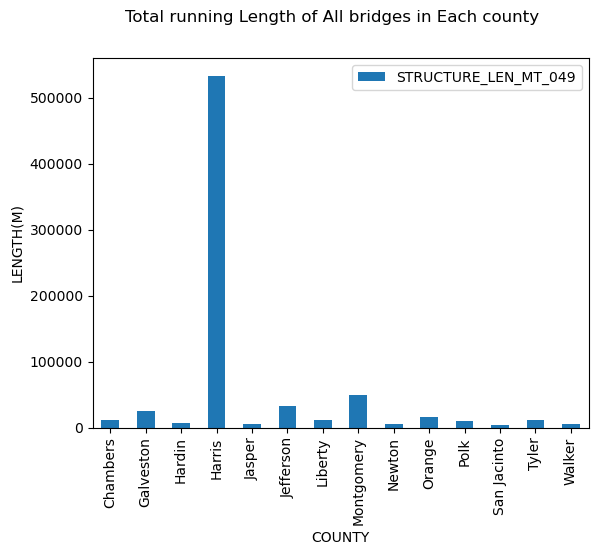

In [116]:
result.plot(x='County_name', y='STRUCTURE_LEN_MT_049', kind='bar') 
plt.xlabel('COUNTY')
plt.ylabel('LENGTH(M)')
plt.suptitle('Total running Length of All bridges in Each county', 
             fontsize = 12)
plt.show()

<p> <font color='blue'> Connecting table culvert with special </font> </p>

In [38]:
cur.execute( '''create table Main2 as SELECT STRUCTURE_NUMBER_008, DETOUR_KILOS_019, MAINTENANCE_021, YEAR_BUILT_027, ADT_029, STRUCTURE_KIND_043A, STRUCTURE_LEN_MT_049, CULVERT_COND_062, YEAR_RECONSTRUCTED_106, County_name
FROM culvert
INNER JOIN  special on special.COUNTY_CODE_003 = culvert.COUNTY_CODE_003 ; ''')

<p> <font color='blue'> Connecting new joined table Main2 with culv_cond </font> </p>

In [39]:
cur.execute( '''create table ABC as SELECT STRUCTURE_NUMBER_008, County_name, Description
FROM Main2
INNER JOIN   culv_cond on culv_cond.CULVERT_COND_062 = Main2.CULVERT_COND_062 ; ''')

<p> <font color='blue'>  Running queries to find out the number of culverts in excellent condition </font> </p>

In [40]:
cur.execute('''SELECT count(STRUCTURE_NUMBER_008) From ABC where Description="No deficiencies."''')
cur.fetchall()

[(1,)]

<p> <font color='blue'>  Running queries to find out the number of culverts in worst condition </font> </p>

In [41]:
cur.execute('''SELECT count(STRUCTURE_NUMBER_008) From ABC where Description="Bridge closed. Replacement necessary."''')
cur.fetchall()

[(0,)]

<p> <font color='blue'>  Running queries to find out what kind of condition most of the culverts are in</font> </p>

In [42]:
cur.execute('''SELECT County_name, Description, COUNT(*) FROM ABC GROUP BY Description Order By Count(*) DESC;''') 
cur.fetchall()

[('Walker',
  'Shrinkage cracks, light scaling, and insignificant spalling which does not expose reinforcing steel. Insignificant damage caused by drift with no misalignment and not requiring corrective action. Some minor scouring has occurred near curtain walls, wingwalls, or pipes. Metal culverts have a smooth symmetrical curvature with superficial corrosion and no pitting.',
  1016),
 ('Walker',
  'Deterioration or initial disintegration, minor chloride contamination, cracking with some leaching, or spalls on concrete or masonry walls and slabs. Local minor scouring at curtain walls, wingwalls, or pipes. Metal culverts have a smooth curvature, non-symmetrical shape, significant corrosion or moderate pitting.',
  538),
 ('Walker',
  'Moderate to major deterioration or disintegration, extensive cracking and leaching, or spalls on concrete or masonry walls and slabs. Minor settlement or misalignment. Noticeable scouring or erosion at curtain walls, wingwalls, or pipes. Metal culverts h

<p> <font color='blue'> Creating another table by taking maintenance_021 as PK in maintenance table and foreign key in main2 table  </font> </p>

In [43]:
cur.execute( '''create table AAA as SELECT STRUCTURE_NUMBER_008, County_name, Description
FROM Main2
INNER JOIN   maintenance on maintenance.MAINTENANCE_021 = Main2.MAINTENANCE_021 ; ''')

<p><font color='blue'> Running query to obtain the number of culverts maintained by state highway agency </font> </p>

In [44]:
cur.execute('''SELECT count(STRUCTURE_NUMBER_008) From AAA where Description="State Highway Agency"''')
cur.fetchall()

[(916,)]

<AxesSubplot:>

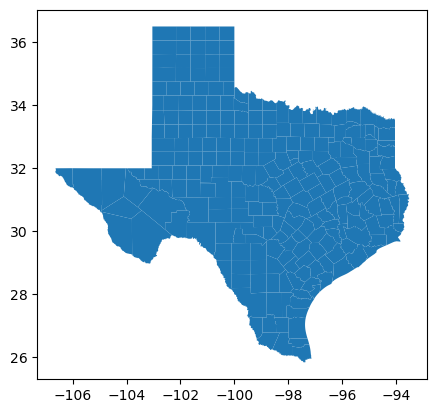

In [105]:
county1 = gpd.read_file('C://Users//sanni//OneDrive//Desktop//Project2//County.shp')
county1.plot()


In [106]:
BMAP1 = ('Newton|Jefferson|Harris|Chambers|Walker|Montgomery|Galveston|Polk|San Jacinto|Liberty|Tyler|Hardin|Jasper|Orange')
BMAP_1 = county1[county1['CNTY_NM'].str.contains(BMAP1)]

In [107]:

BMAP2 = ['Newton','Jefferson','Harris','Chambers','Walker','Montgomery',
        'Galveston','Polk','San Jacinto','Liberty','Tyler','Hardin',
        'Jasper','Orange']

BMAP = []
for n in BMAP2:
    BMAP_2 = county1.loc[county1['CNTY_NM']==n]
    BMAP.append(BMAP_2)

In [108]:
BMAP3 = pd.concat(BMAP)
BMAP3.head()

,OBJECTID,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,GID,SHAPE_Leng,SHAPE_Area,geometry
60,61,176,176,48351,176,20,Newton,95,3.668968,0.229431,"POLYGON ((-93.54377 31.18340, -93.54358 31.183..."
24,25,123,123,48245,124,20,Jefferson,59,2.786242,0.240442,"POLYGON ((-94.18898 30.18406, -94.18887 30.183..."
19,20,101,101,48201,102,12,Harris,54,4.056308,0.429773,"POLYGON ((-95.04396 30.02689, -95.04277 30.023..."
12,13,36,36,48071,36,20,Chambers,47,2.564857,0.209734,"POLYGON ((-94.35798 29.88355, -94.35785 29.878..."
52,53,236,236,48471,236,17,Walker,87,2.152041,0.195448,"POLYGON ((-95.43469 31.05801, -95.43461 31.049..."


<AxesSubplot:>

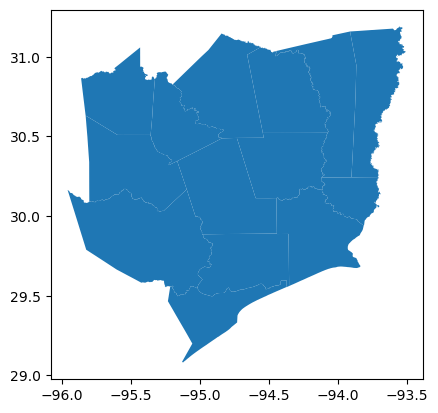

In [109]:
BMAP3.plot()

In [111]:
geo_county1 = gpd.GeoDataFrame(BMAP3)

In [112]:
gdf = geo_county1

In [113]:
gdf2=geo_county 

<P><font color = 'blue'>'Showing the bridges with good superstructure condition'</font></p>

<AxesSubplot:xlabel='COUNTY', ylabel='LENGTH(M)'>

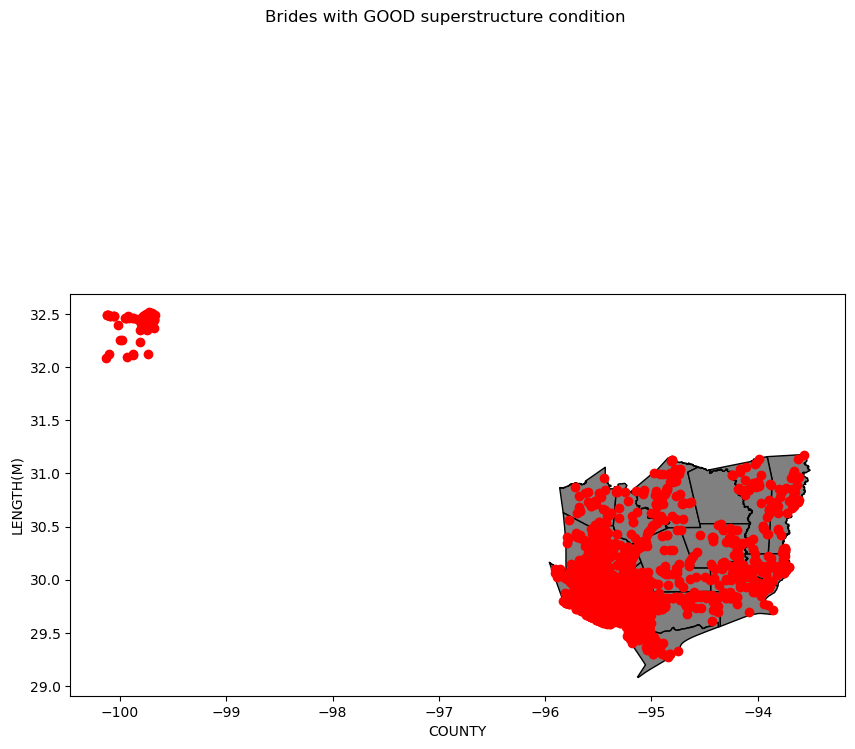

In [119]:
fig,ax = plt.subplots(figsize=(10,10))
plt.xlabel('COUNTY')
plt.ylabel('LENGTH(M)')
plt.suptitle('Brides with GOOD superstructure condition', 
             fontsize = 12)
gdf.plot(ax = ax , color = 'grey',edgecolor = 'black')
gdf2.plot(ax = ax , color = 'r')